In [20]:
using PlutoUI
	using CSV
	using DataFrames
	using StatsPlots
	using Plots
	using Statistics
	using Pkg; 
	Pkg.add("LinearRegression")

   Resolving 

package versions...


  No Changes to `C:\Users\user\.julia\environments\v1.8\Project.toml`


  No Changes to `C:\Users\user\.julia\environments\v1.8\Manifest.toml`

In [21]:
df = CSV.read(joinpath(dirname(@__FILE__), "Concrete_Data_DNO.csv"), DataFrame)

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate
,Float64,Float64,Float64,Float64,Float64,Float64
1,540.0,0.0,0.0,162.0,2.5,1040.0
2,540.0,0.0,0.0,162.0,2.5,1055.0
3,332.5,142.5,0.0,228.0,0.0,932.0
4,332.5,142.5,0.0,228.0,0.0,932.0
5,198.6,132.4,0.0,192.0,0.0,978.4
6,266.0,114.0,0.0,228.0,0.0,932.0
7,380.0,95.0,0.0,228.0,0.0,932.0
8,380.0,95.0,0.0,228.0,0.0,932.0
9,266.0,114.0,0.0,228.0,0.0,932.0


In [22]:
x = Matrix(df[:, 1:8])
y = Matrix(df[:, 9:9])

xtrain = x[1:700, :]
ytrain = y[1:700]

xtest = x[701:850, :]
ytest = y[701:850]

xval = x[851:1030, :]
yval = y[851:1030]

180-element Vector{Float64}:
 37.36
 32.84
 42.64
 40.06
 41.94
 61.23
 40.87
 33.3
 52.42
 15.09
  ⋮
 31.88
 41.54
 39.46
 37.92
 44.28
 31.18
 23.7
 32.77
 32.4

In [23]:
function mse(ŷ::Vector{T}, y::Vector{T})::T where T<:AbstractFloat
    sum((ŷ-y).^2/length(y))
end

mse (generic function with 1 method)

In [25]:
function minimize(f, β::T, η::T, numsteps::Int) where T<:AbstractFloat
	for n in 1:numsteps
	gradient= f'(β)
	β= β-η*gradient
	end
	return β
end

minimize (generic function with 1 method)

In [26]:
function f(β::T, x::Vector{T}) where T<:AbstractFloat
	return β * x
end

f (generic function with 1 method)

In [27]:
y1= df."Water/Cement"
y2= df."Concrete_compressive_strength"
#x= collect(1.0:10.0)

1030-element Vector{Float64}:
 79.99
 61.89
 40.27
 41.05
 44.3
 47.03
 43.7
 36.45
 45.85
 39.29
  ⋮
 31.88
 41.54
 39.46
 37.92
 44.28
 31.18
 23.7
 32.77
 32.4

In [28]:
function train(f_model, f_err, β_guess::T, x::Vector{T}, y::Vector{T}, η::T, numsteps::Int) where T<:AbstractFloat
	e(β)= f_err(f_model(β,x),y)
	minimize(e,β_guess,η,numsteps)
end

train (generic function with 1 method)

In [29]:
function e₁(ŷ::Vector{T}, y::Vector{T}) where T<:AbstractFloat
	Error2= mean(abs.(ŷ .- y))
end

e₁ (generic function with 1 method)

In [30]:
function e₂(ŷ::Vector{T}, y::Vector{T}) where T<:AbstractFloat
	Error3= mean(abs.(ŷ .- y).^2).^0.5
end

e₂ (generic function with 1 method)

In [31]:
function e∞(ŷ::Vector{T}, y::Vector{T}) where T<:AbstractFloat
	Error1= maximum(abs.(y-ŷ))
end

e∞ (generic function with 1 method)

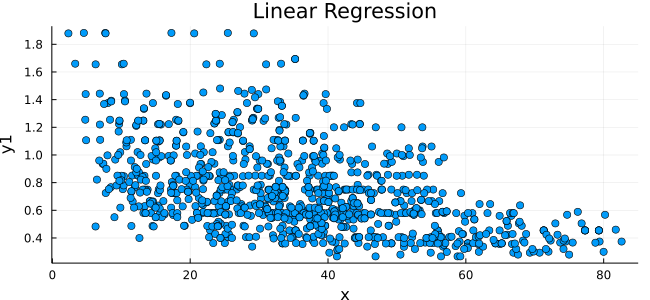

In [32]:
let
		#ŷ1_e∞ = x * train(f, e∞, 1.0, x, y1, 0.001, 1000)
		#ŷ1_e₁ = x * train(f, e₁, 1.0, x, y1, 0.001, 1000)
		#ŷ1_e₂ = x * train(f, e₂, 1.0, y2, y1, 0.001, 1000)

		p1 = scatter(y2, y1, legend=:none, xlabel="x", ylabel="y1")
		#plot!(x, ŷ1_e∞)
		#plot!(x, ŷ1_e₁)
		#plot!(x, ŷ1_e₂)
		title!("Linear Regression")

		plot(p1, size=(650, 300))
end

In [33]:
strength_predicted1= -28.328.*y1 .+59.715
strength_predicted2= 27.587.*(y1).^-0.676

1030-element Vector{Float64}:
 62.25446520620652
 62.25446520620652
 35.601776818273315
 35.601776818273315
 28.224536141514264
 30.616849875849418
 38.96495954026381
 38.96495954026381
 30.616849875849418
 45.30909611725896
  ⋮
 35.00024624784543
 33.841454532577
 26.62656380367271
 25.80833129933911
 36.92097051765933
 38.60399343074963
 23.131911302233533
 25.806846960274903
 32.95074549106847

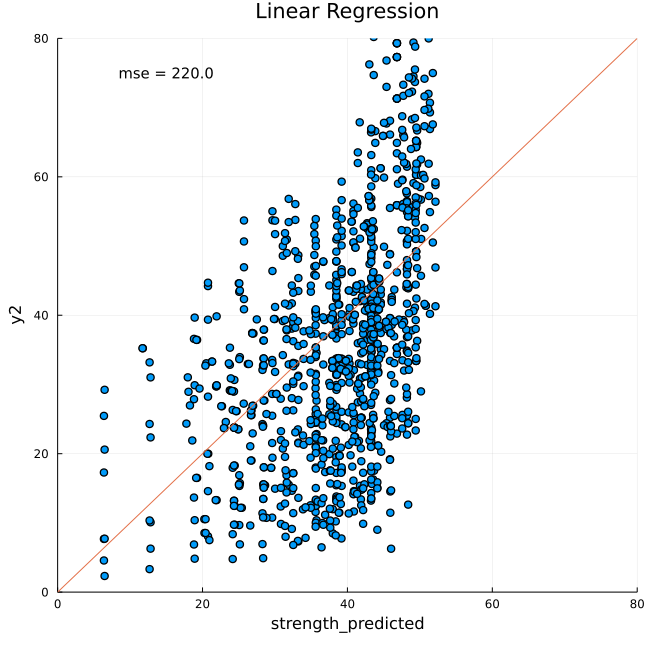

In [34]:
p1 = scatter(strength_predicted1, y2, legend=:none, xlabel="strength_predicted", ylabel="y2", xlims=[0,80],ylims=[0,80])
		title!("Linear Regression")
p1b= (0:80,0:80)
mse_SVR = mse(strength_predicted1, y2)
annotate!(15,75, text("mse = $(round(mse_SVR, sigdigits=2))", 10))
		plot(p1,p1b, size=(650, 650))

In [35]:
#e₂(strength_predicted1,y2)

14.713506677835879

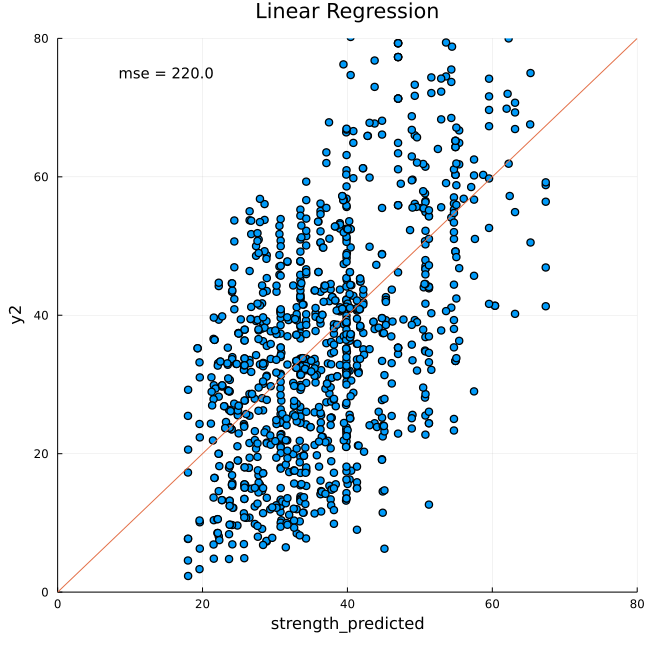

In [39]:
p2 = scatter(strength_predicted2, y2, legend=:none, xlabel="strength_predicted", ylabel="y2", xlims=[0,80],ylims=[0,80])
		title!("Linear Regression")
		p2b= (0:80,0:80)
		mse_SVR2 = mse(strength_predicted2, y2)
		annotate!(15,75, text("mse = $(round(mse_SVR, sigdigits=2))", 10))
		plot(p2,p2b, size=(650, 650))